In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count - must be at least 500 cities
len(cities)

606

In [10]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"City not found:{city}. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | fairbanks
Processing Record 4 of Set 1 | touros
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | molo
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | usinsk
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | khatanga
Processing Record 13 of Set 1 | upernavik
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | tharad
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | shchelkun
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | luena
Processing Record 21 of Set 1 | nurobod
Processing Record 22 of Set 1 | murgab
Processing Record 23 of Set 1 | hobart
Processing Record 24 of Set 1 | provideniya
Processing Record 25 of Set 1 | lakes entra

Processing Record 35 of Set 4 | aberdeen
Processing Record 36 of Set 4 | hovd
Processing Record 37 of Set 4 | clyde river
Processing Record 38 of Set 4 | maridi
Processing Record 39 of Set 4 | karratha
Processing Record 40 of Set 4 | bathsheba
Processing Record 41 of Set 4 | tena
Processing Record 42 of Set 4 | savannah bight
Processing Record 43 of Set 4 | arman
Processing Record 44 of Set 4 | kununurra
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | buala
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | ponta do sol
Processing Record 49 of Set 4 | kingisepp
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | kifri
Processing Record 3 of Set 5 | kutum
Processing Record 4 of Set 5 | kenai
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | yar-sale
Processing Record 7 of Set 5 | adrar
Processing Record 8 of Set 5 | blagoveshchensk
Processing Recor

Processing Record 26 of Set 8 | byron bay
Processing Record 27 of Set 8 | dingle
Processing Record 28 of Set 8 | bugembe
Processing Record 29 of Set 8 | santona
Processing Record 30 of Set 8 | grand centre
City not found:grand centre. Skipping...
Processing Record 31 of Set 8 | dawei
Processing Record 32 of Set 8 | hobyo
Processing Record 33 of Set 8 | umzimvubu
City not found:umzimvubu. Skipping...
Processing Record 34 of Set 8 | winnemucca
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | anshun
Processing Record 37 of Set 8 | coronado
Processing Record 38 of Set 8 | jiwani
Processing Record 39 of Set 8 | nanakuli
Processing Record 40 of Set 8 | banepa
Processing Record 41 of Set 8 | verkhoyansk
Processing Record 42 of Set 8 | darnah
Processing Record 43 of Set 8 | takoradi
Processing Record 44 of Set 8 | bargal
City not found:bargal. Skipping...
Processing Record 45 of Set 8 | wewak
Processing Record 46 of Set 8 | puerto carreno
Processing Record 47 of Set 8

Processing Record 11 of Set 12 | phonhong
Processing Record 12 of Set 12 | ancud
Processing Record 13 of Set 12 | paragominas
Processing Record 14 of Set 12 | shreveport
Processing Record 15 of Set 12 | kaeo
Processing Record 16 of Set 12 | altus
Processing Record 17 of Set 12 | caluquembe
Processing Record 18 of Set 12 | koumac
Processing Record 19 of Set 12 | saint-joseph
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | omama
Processing Record 22 of Set 12 | lewisburg
Processing Record 23 of Set 12 | grindavik
Processing Record 24 of Set 12 | kibala
Processing Record 25 of Set 12 | fengkou
Processing Record 26 of Set 12 | vila franca do campo
Processing Record 27 of Set 12 | nuuk
Processing Record 28 of Set 12 | sao luis de montes belos
Processing Record 29 of Set 12 | vilhena
Processing Record 30 of Set 12 | jaranwala
Processing Record 31 of Set 12 | jodiya
Processing Record 32 of Set 12 | mapiri
Processing Record 33 of Set 12 | tacna
Processing Record 34 o

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.11,87,75,17.27,CL,2022-05-05 03:10:07
1,Hilo,19.7297,-155.0900,77.29,93,100,6.91,US,2022-05-05 03:07:34
2,Fairbanks,64.8378,-147.7164,55.40,35,0,10.36,US,2022-05-05 03:06:42
3,Touros,-5.1989,-35.4608,76.17,93,91,10.94,BR,2022-05-05 03:10:08
4,Busselton,-33.6500,115.3333,61.74,44,0,15.66,AU,2022-05-05 03:08:55
5,New Norfolk,-42.7826,147.0587,57.70,68,64,3.00,AU,2022-05-05 03:10:09
6,Rikitea,-23.1203,-134.9692,77.81,84,74,19.30,PF,2022-05-05 03:10:09
7,Molo,-0.2479,35.7374,49.80,95,34,4.00,KE,2022-05-05 03:07:22
8,Avarua,-21.2078,-159.7750,80.65,74,20,5.75,CK,2022-05-05 03:08:52
9,Usinsk,65.9939,57.5281,23.43,76,31,10.63,RU,2022-05-05 03:10:10


In [13]:
#Next, we'll reorder the columns as 
#City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, 
#so they are easy to read.

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-05 03:10:07,-53.1500,-70.9167,41.11,87,75,17.27
1,Hilo,US,2022-05-05 03:07:34,19.7297,-155.0900,77.29,93,100,6.91
2,Fairbanks,US,2022-05-05 03:06:42,64.8378,-147.7164,55.40,35,0,10.36
3,Touros,BR,2022-05-05 03:10:08,-5.1989,-35.4608,76.17,93,91,10.94
4,Busselton,AU,2022-05-05 03:08:55,-33.6500,115.3333,61.74,44,0,15.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

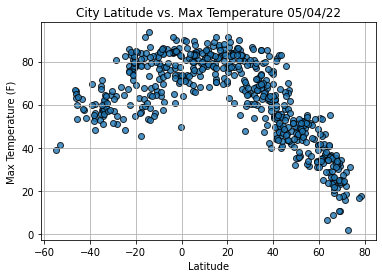

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

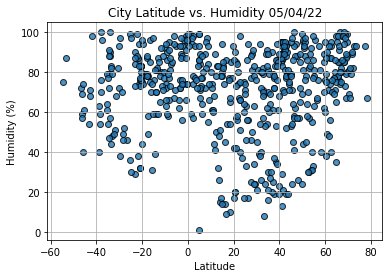

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

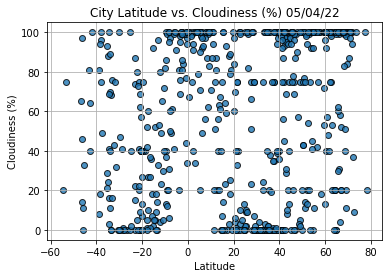

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

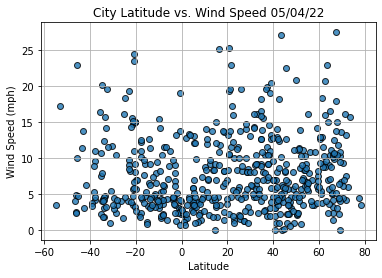

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2022-05-05 03:10:07,-53.1500,-70.9167,41.11,87,75,17.27
3,Touros,BR,2022-05-05 03:10:08,-5.1989,-35.4608,76.17,93,91,10.94
4,Busselton,AU,2022-05-05 03:08:55,-33.6500,115.3333,61.74,44,0,15.66
5,New Norfolk,AU,2022-05-05 03:10:09,-42.7826,147.0587,57.70,68,64,3.00
6,Rikitea,PF,2022-05-05 03:10:09,-23.1203,-134.9692,77.81,84,74,19.30
...,...,...,...,...,...,...,...,...,...
555,Fomboni,KM,2022-05-05 03:25:44,-12.2800,43.7425,82.67,65,80,7.40
556,Sola,VU,2022-05-05 03:25:45,-13.8833,167.5500,82.02,70,18,4.27
558,Voh,NC,2022-05-05 03:25:46,-20.9667,164.7000,79.68,77,62,5.84
561,Charters Towers,AU,2022-05-05 03:25:47,-20.1000,146.2667,84.76,44,0,2.62


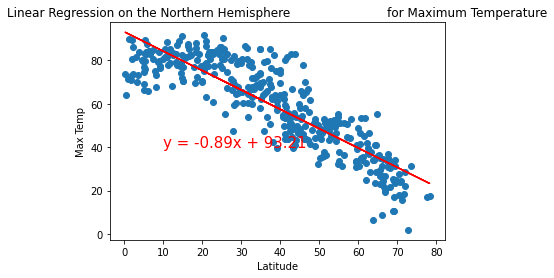

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

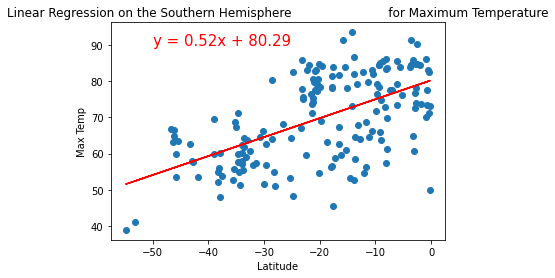

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

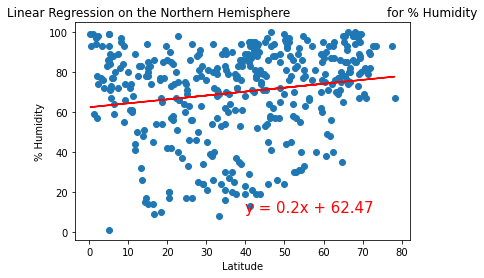

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

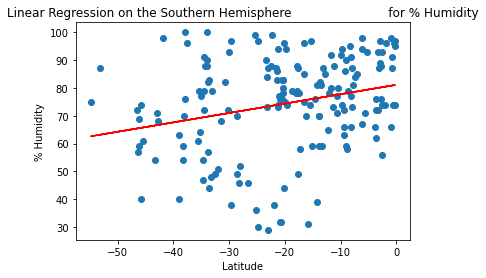

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

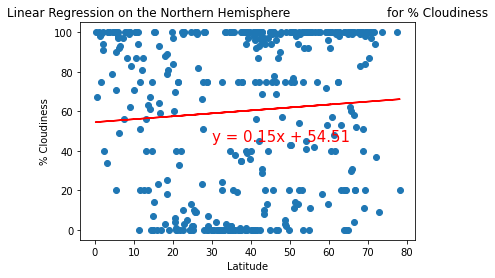

In [40]:
#Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,45))

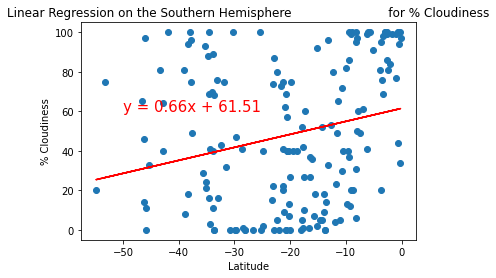

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

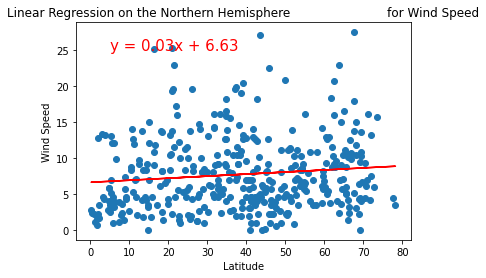

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,25))

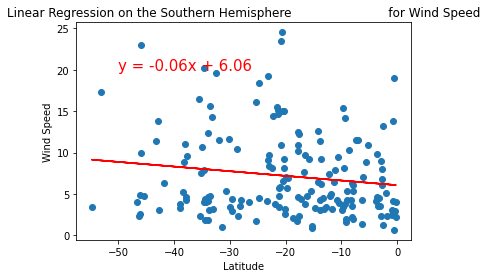

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))